# ANALYZING AMAZON SALES DATA


In [30]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Loading Dataset
df = pd.read_csv('Amazon Sales data.csv')

In [32]:
# Dropping rows with missing values
df.dropna(inplace=True)  
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Converting 'Order Date' to datetime

In [33]:
# Extracting Date Parts
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M')

In [34]:
# Aggregating Sales Data
monthly_sales = df.groupby('Month')['Total Revenue'].sum()
yearly_sales = df.groupby('Year')['Total Revenue'].sum()
yearly_monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum()

In [35]:
# Calculating Key Metrics
total_sales = df['Total Revenue'].sum()
average_sales_per_order = df['Total Revenue'].mean()
total_orders = df.shape[0]

In [36]:
# Correlation Analysis
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

In [37]:
# Plotting Sales Trends
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [38]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,YearMonth
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


Text(0, 0.5, 'Sales')

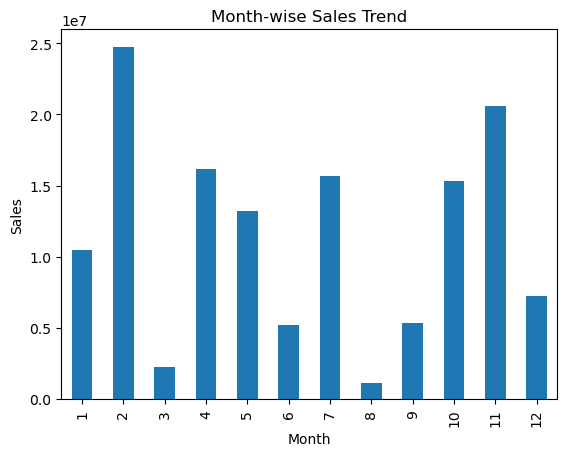

In [39]:
# Month-wise Sales Trend
plt.subplot(1, 1, 1)
monthly_sales.plot(kind='bar')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')



Text(0, 0.5, 'Sales')

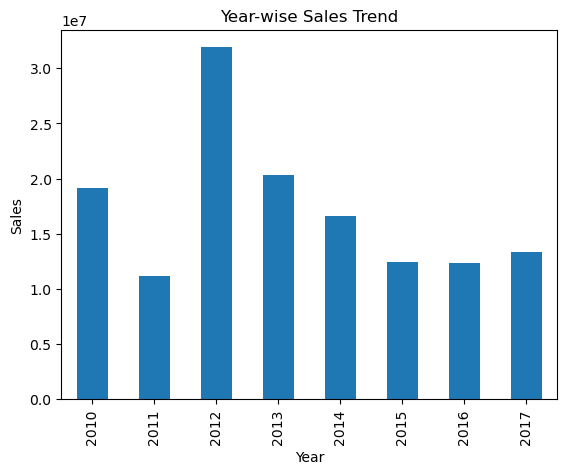

In [40]:
# Year-wise Sales Trend
plt.subplot(1, 1, 1)
yearly_sales.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')



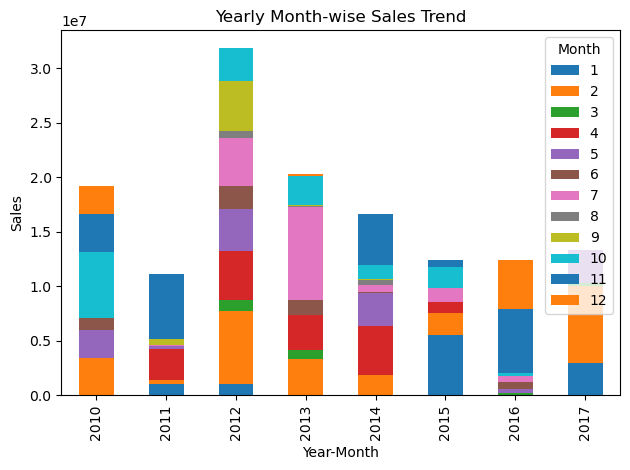

In [41]:
# Yearly Month-wise Sales Trend

yearly_monthly_sales.unstack().plot(kind='bar', stacked=True)
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()



Total Sales: 137348768.31
Average Sales per Order: 1373487.6831
Total Orders: 100


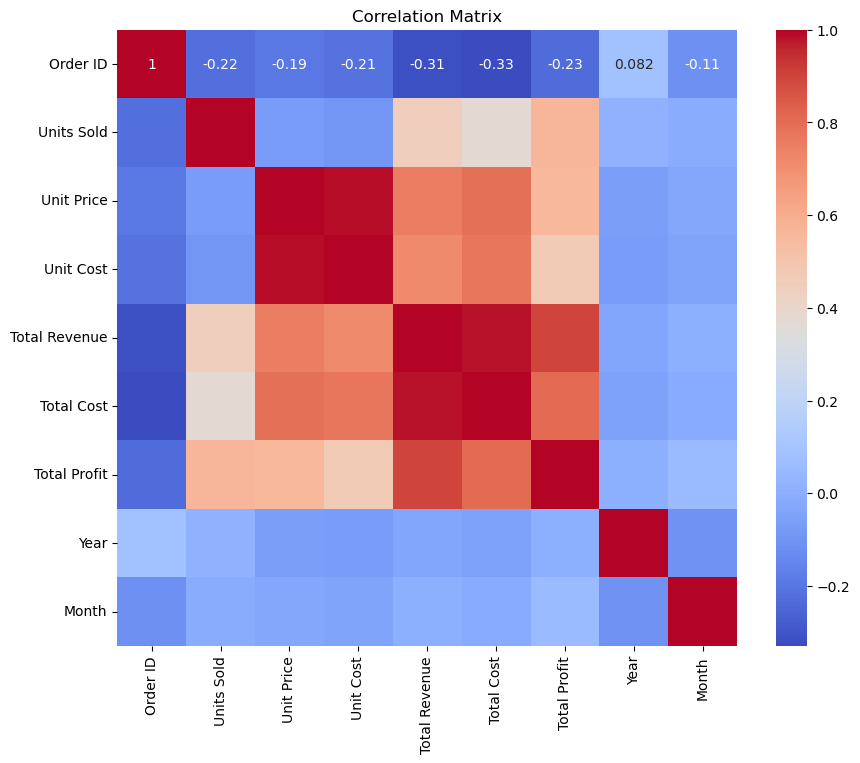

In [42]:
# Displaying Key Metrics
print(f"Total Sales: {total_sales}")
print(f"Average Sales per Order: {average_sales_per_order}")
print(f"Total Orders: {total_orders}")

# Displaying Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



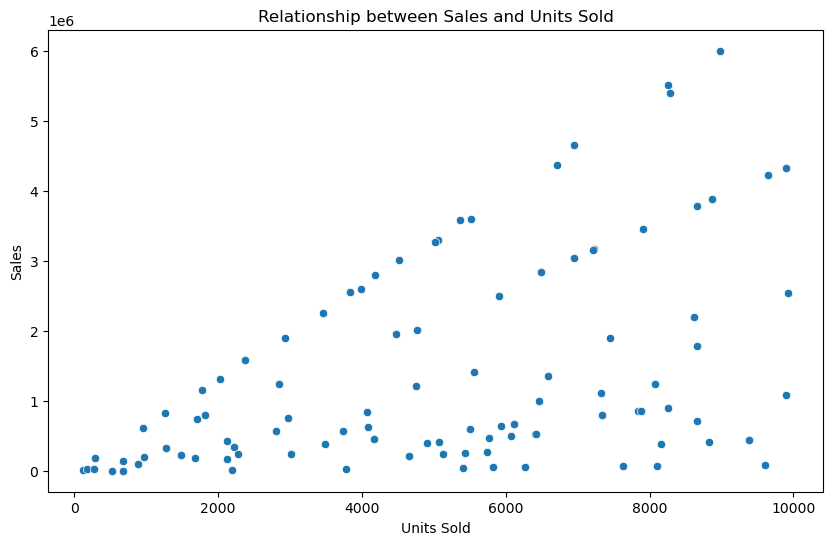

In [43]:
# Finding meaningful relationships
# Example: Relationship between Sales and Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Units Sold', y='Total Revenue')
plt.title('Relationship between Sales and Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Sales')
plt.show()

In [44]:
# Saving the results to CSV files
monthly_sales.to_csv('monthly_sales.csv')
yearly_sales.to_csv('yearly_sales.csv')
yearly_monthly_sales.to_csv('yearly_monthly_sales.csv')